In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
#application data
data = pd.read_csv(r"C:\Users\mani ganesh\Desktop\loan data set\application_data.csv")

#previous application data
pdata = pd.read_csv(r"C:\Users\mani ganesh\Desktop\loan data set\previous_application.csv")

#columns description
descritption = pd.read_csv(r"C:\Users\mani ganesh\Desktop\loan data set\columns_description.csv")

#### INSPECING APPLICATION DATA

In [2]:
data.shape

(307511, 122)

There 122 columns in this dataset its a lot so we start with checking the null values of each column

In [3]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending = False))
missing

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
...,...
NAME_HOUSING_TYPE,0
NAME_FAMILY_STATUS,0
NAME_EDUCATION_TYPE,0
NAME_INCOME_TYPE,0


We can reset the index and rename the column name and add new column as percent that have percentage of null values in each column

In [4]:
missing.reset_index(inplace=True)
missing.head()

,index,0
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_MODE,213514
4,NONLIVINGAPARTMENTS_AVG,213514


In [5]:
missing.rename(columns={'index':'column',0:'null_count'},inplace=True)
missing['percent'] = missing['null_count']/data.shape[0]*100
missing.head()


,column,null_count,percent
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963


Calculate the number of columns that has missing percentage more than 40

In [6]:
missing[missing.percent>40]

,column,null_count,percent
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


There are 49 columns that has missing values more than 40%. I believe this kind of data will not make much sense even when imputation, so we can remove those columns

In [7]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
data.drop(missing[missing.percent>40]['column'].values,axis=1,inplace=True)

In [9]:
data.shape

(307511, 73)

the columns has been reduced from 122 to 73 columns we removed 49 columns

#### INVESTIGATING THE COLUMNS

In [10]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

we can see there are lots of column starting with the FLAG, so we can investigate them 

In [11]:
cols_with_flag = data.columns[data.columns.str.startswith('FLAG')]
cols_with_flag

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [12]:
#concatenating the cols_with_flag and TARGET column from data
flags_cols_data = data[np.concatenate([cols_with_flag,np.array(['TARGET'])])]
flags_cols_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   FLAG_OWN_CAR      307511 non-null  object
 1   FLAG_OWN_REALTY   307511 non-null  object
 2   FLAG_MOBIL        307511 non-null  int64 
 3   FLAG_EMP_PHONE    307511 non-null  int64 
 4   FLAG_WORK_PHONE   307511 non-null  int64 
 5   FLAG_CONT_MOBILE  307511 non-null  int64 
 6   FLAG_PHONE        307511 non-null  int64 
 7   FLAG_EMAIL        307511 non-null  int64 
 8   FLAG_DOCUMENT_2   307511 non-null  int64 
 9   FLAG_DOCUMENT_3   307511 non-null  int64 
 10  FLAG_DOCUMENT_4   307511 non-null  int64 
 11  FLAG_DOCUMENT_5   307511 non-null  int64 
 12  FLAG_DOCUMENT_6   307511 non-null  int64 
 13  FLAG_DOCUMENT_7   307511 non-null  int64 
 14  FLAG_DOCUMENT_8   307511 non-null  int64 
 15  FLAG_DOCUMENT_9   307511 non-null  int64 
 16  FLAG_DOCUMENT_10  307511 non-null  int

In [13]:
#removing the columns with object datatypes so we can plot the corr_matrix
object_columns = flags_cols_data.select_dtypes(include = ['object']).columns
flags_cols_data = flags_cols_data.drop(object_columns, axis = 1 )

<Axes: >

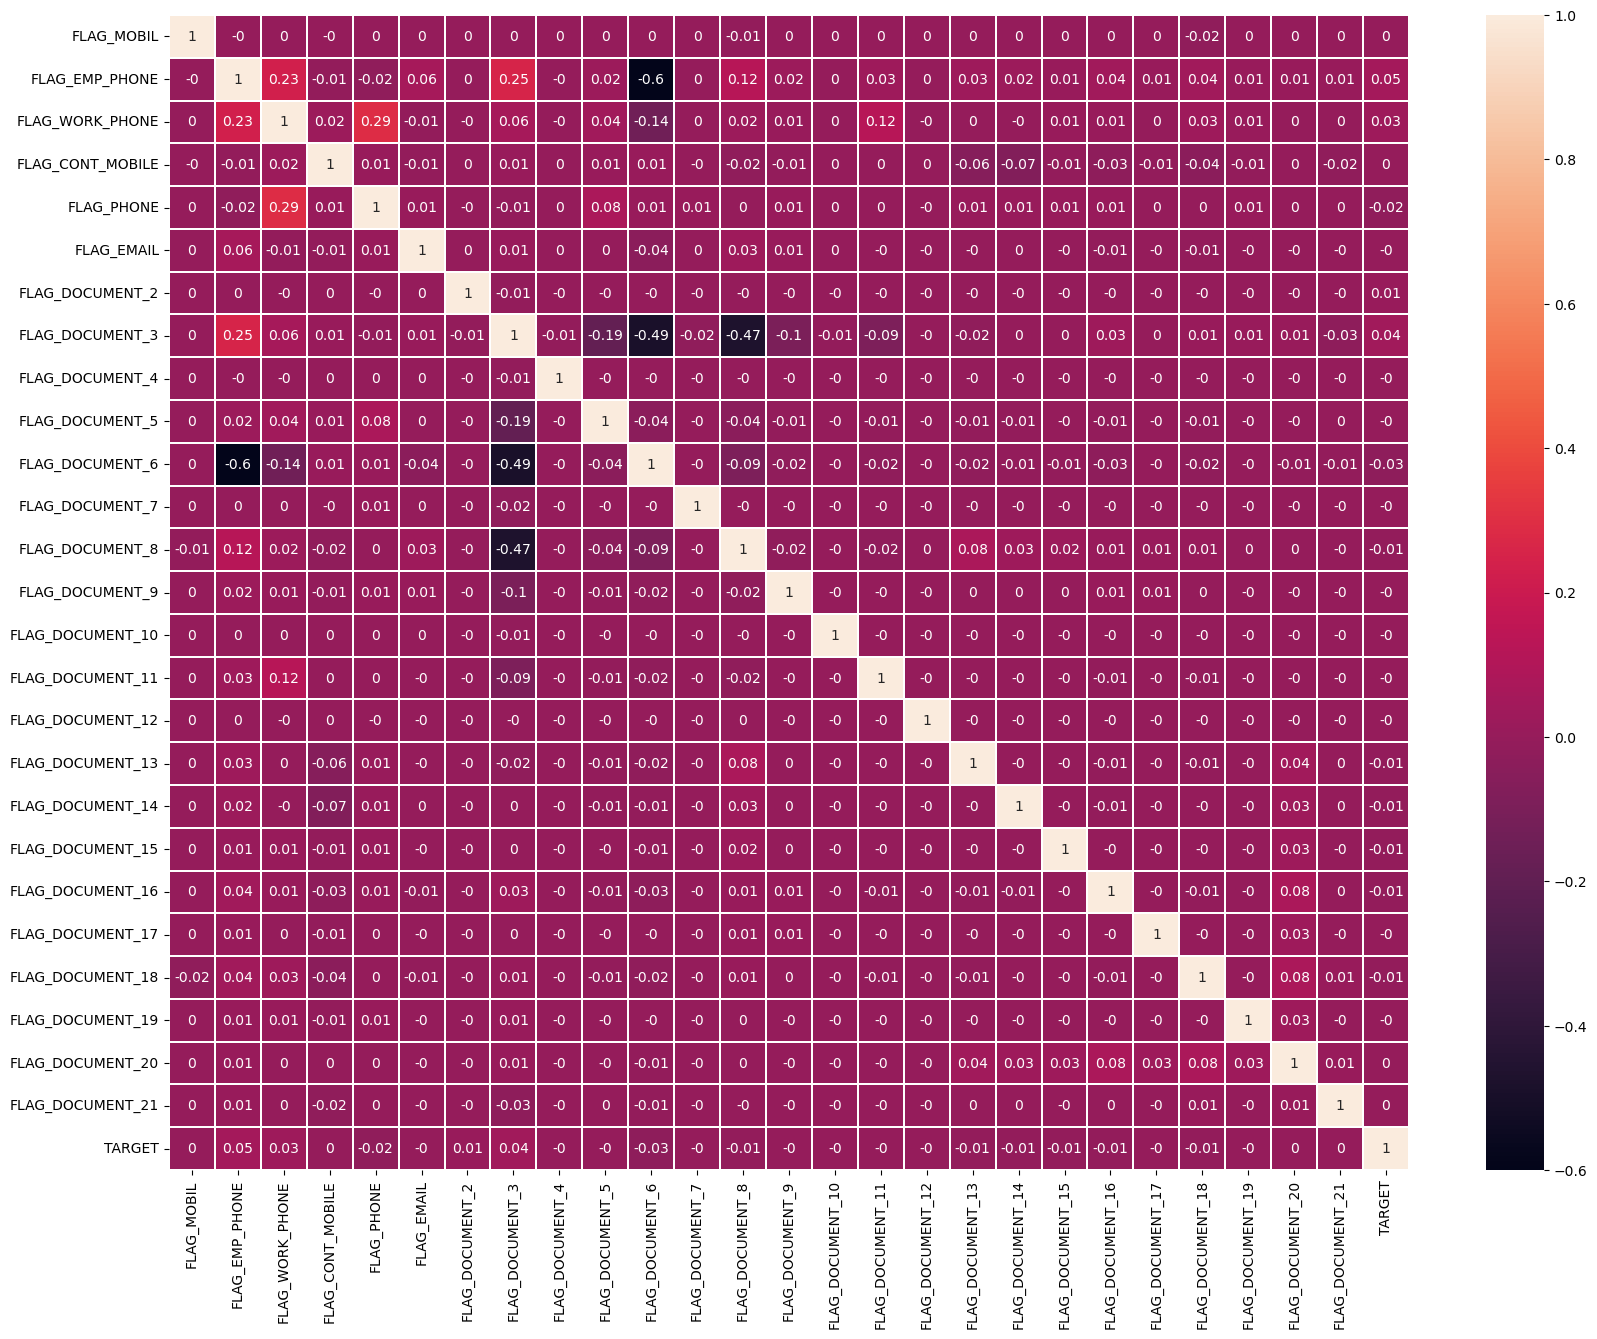

In [14]:
#Observing the correlation
plt.figure(figsize = (20,15))
corr_matrix = round(flags_cols_data.corr(),2)
sns.heatmap(corr_matrix,linewidth = 0.2, annot = True)

As we see they are very less correlation with the target, which is totaly insignificant, so we can remove them

In [15]:
data.drop(cols_with_flag, axis = 1, inplace = True)

In [16]:
data.shape

(307511, 45)

As we see the column has been reduced from 73 to 45

#### Check if any other columns can be removed

In [17]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

In [19]:
missing = pd.DataFrame(data.isna().sum().sort_values(ascending = False))
missing.reset_index(inplace=True)
missing.rename(columns = {'index':'column',0:'null_count'},inplace = True)
missing['percent'] = missing['null_count']/data.shape[0]*100

In [20]:
missing

,column,null_count,percent
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021


As we see there is no column that has null values more 40%, we can check them...

In [21]:
missing[missing.percent>40]

,column,null_count,percent


#### DEALING MISSING VALUES OF NUMERIC VARIABLES

The mean is used for normal number distributions, which have a low amount of outliers.
If there are more outliers in the data, then median is generally used as it returns the central tendency for skewed number distributions
The mode is typically used when dealing with categorical or discrete data, rather than numeric variables. 

We can deal column wise for the rest of missing values

#### DAYS_LAST_PHONE_CHANGE

In [22]:
data['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

In [23]:
data.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace = True)

As there is only one row with null value, decided to remove it.

#### CNT_FAM_MEMBERS

In [24]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mode()[0])
data['CNT_FAM_MEMBERS'].isnull().sum()

0

#### AMT_ANNUITY

In [25]:
data['AMT_ANNUITY'].isna().sum()

12

<Axes: >

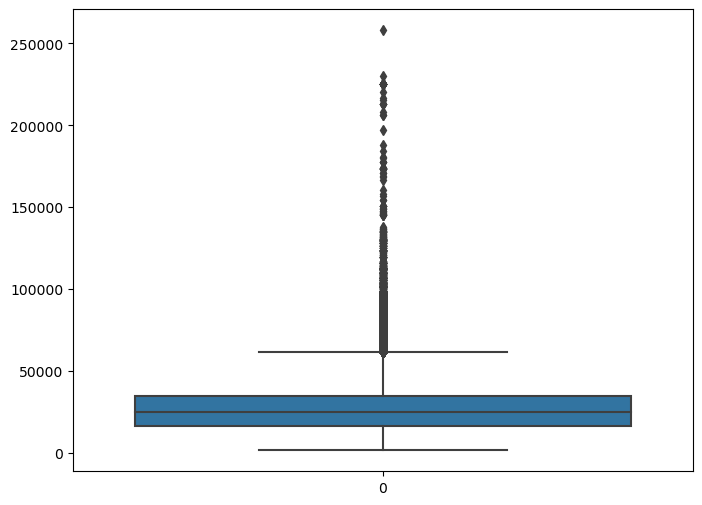

In [26]:
plt.figure(figsize =(8,6))
sns.boxplot(data['AMT_ANNUITY'])

Observing that it has significant amount of outliers, decided to impute with median

In [27]:
data['AMT_ANNUITY'] = data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].median())
data['AMT_ANNUITY'].isna().sum()

0

#### AMT_GOODS_PRICE

<Axes: >

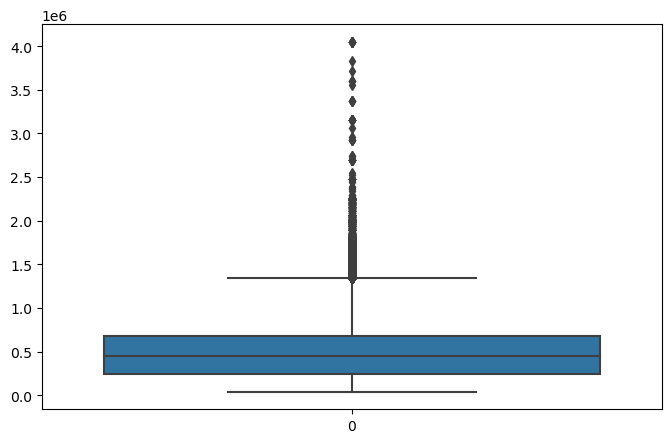

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(data['AMT_GOODS_PRICE'])

Observing that it has significant amount of outliers, decided to impute with median

In [29]:
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median())
data['AMT_GOODS_PRICE'].isna().sum()

0

#### AMT_GOODS_PRICE

<Axes: >

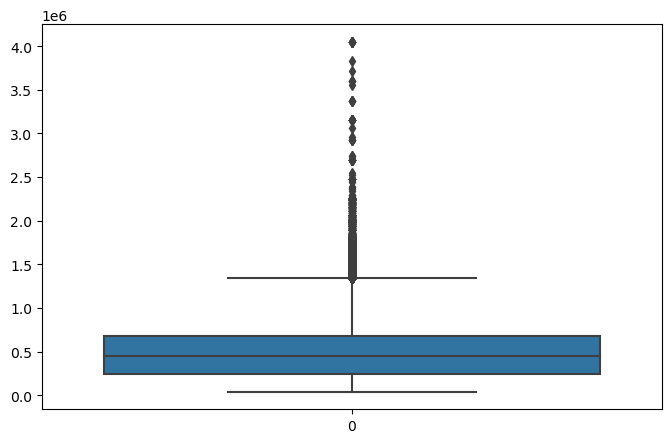

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data['AMT_GOODS_PRICE'])

Observing that it has significant amount of outliers, decided to impute with median

In [31]:
data['AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].median())
data['AMT_GOODS_PRICE'].isna().sum()

0

#### DEALING MISSING VALUES OF CATEGORICAL VARIABLES

In [32]:
data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [33]:
#fill missing values with a new class 'unknown'
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna('Unknown')

In [34]:
# Fill the missing values with mode
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna((data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]))
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna((data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]))

In [35]:
# NAME_TYPE_SUITE
print(data['NAME_TYPE_SUITE'].value_counts())
# 'Unaccompanied' class is purely dominating the distribution. So, we use it to fill the missing values
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna((data['NAME_TYPE_SUITE'].mode()[0]))


Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [36]:
data.isna().sum().sort_values(ascending = False).head(10)

EXT_SOURCE_3                  60964
AMT_REQ_CREDIT_BUREAU_YEAR    41518
AMT_REQ_CREDIT_BUREAU_QRT     41518
AMT_REQ_CREDIT_BUREAU_MON     41518
AMT_REQ_CREDIT_BUREAU_WEEK    41518
AMT_REQ_CREDIT_BUREAU_DAY     41518
AMT_REQ_CREDIT_BUREAU_HOUR    41518
EXT_SOURCE_2                    659
LIVE_CITY_NOT_WORK_CITY           0
REG_REGION_NOT_LIVE_REGION        0
dtype: int64

#### DEALING WITH COLUMNS RELATED TO DATE

In [37]:
data[data['AMT_REQ_CREDIT_BUREAU_DAY'].isna()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
9,100012,0,Revolving loans,M,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN
14,100018,0,Cash loans,F,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,...,0.0,0.0,0.0,-188.0,NaN,NaN,NaN,NaN,NaN,NaN
17,100021,0,Revolving loans,F,1,81000.0,270000.0,13500.0,270000.0,Unaccompanied,...,0.0,4.0,0.0,-2811.0,NaN,NaN,NaN,NaN,NaN,NaN
20,100024,0,Revolving loans,M,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,...,0.0,0.0,0.0,-296.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Fetching the columns
amt_req = []

for k in data.columns:
    if k.startswith('AMT_REQ_CREDIT_BUREAU_'):
        amt_req.append(k) #add the features to the list
        
amt_req

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [39]:
#Impute missing values with median
for col in amt_req:
    data[col] = data[col].fillna(data[col].median())

In [40]:
data.isna().sum().sort_values(ascending=False).head(20)

EXT_SOURCE_3                   60964
EXT_SOURCE_2                     659
SK_ID_CURR                         0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
DAYS_LAST_PHONE_CHANGE             0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_MON          0
dtype: int64

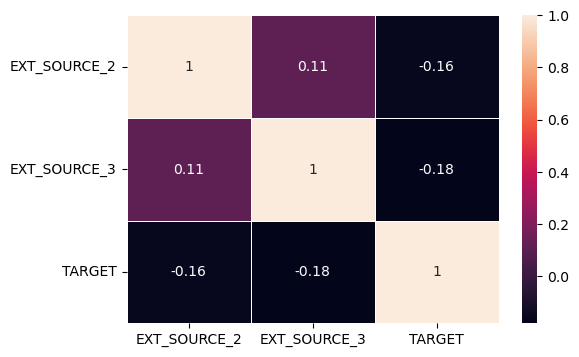

In [41]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(round(data[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].corr(),2),linewidths=0.5, annot=True)
plt.show()

In [42]:
# Drop features
data = data.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'])


#### NUMERICAL VARIABLES BINNING FOR DATA VISUALIZATION

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   CNT_CHILDREN                 307510 non-null  int64  
 5   AMT_INCOME_TOTAL             307510 non-null  float64
 6   AMT_CREDIT                   307510 non-null  float64
 7   AMT_ANNUITY                  307510 non-null  float64
 8   AMT_GOODS_PRICE              307510 non-null  float64
 9   NAME_TYPE_SUITE              307510 non-null  object 
 10  NAME_INCOME_TYPE             307510 non-null  object 
 11  NAME_EDUCATION_TYPE          307510 non-null  object 
 12  NAME_FAMILY_STATUS           307510 non-null  object 
 13 

In [44]:
data.select_dtypes(include = 'float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,1.0,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
data.nunique().sort_values(ascending = False)

SK_ID_CURR                     307510
DAYS_BIRTH                      17460
DAYS_REGISTRATION               15688
AMT_ANNUITY                     13672
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
AMT_CREDIT                       5603
DAYS_LAST_PHONE_CHANGE           3773
AMT_INCOME_TOTAL                 2548
AMT_GOODS_PRICE                  1002
REGION_POPULATION_RELATIVE         81
ORGANIZATION_TYPE                  58
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
AMT_REQ_CREDIT_BUREAU_YEAR         25
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
CNT_CHILDREN                       15
AMT_REQ_CREDIT_BUREAU_QRT          11
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
NAME_INCOME_TYPE                    8
WEEKDAY_APPR

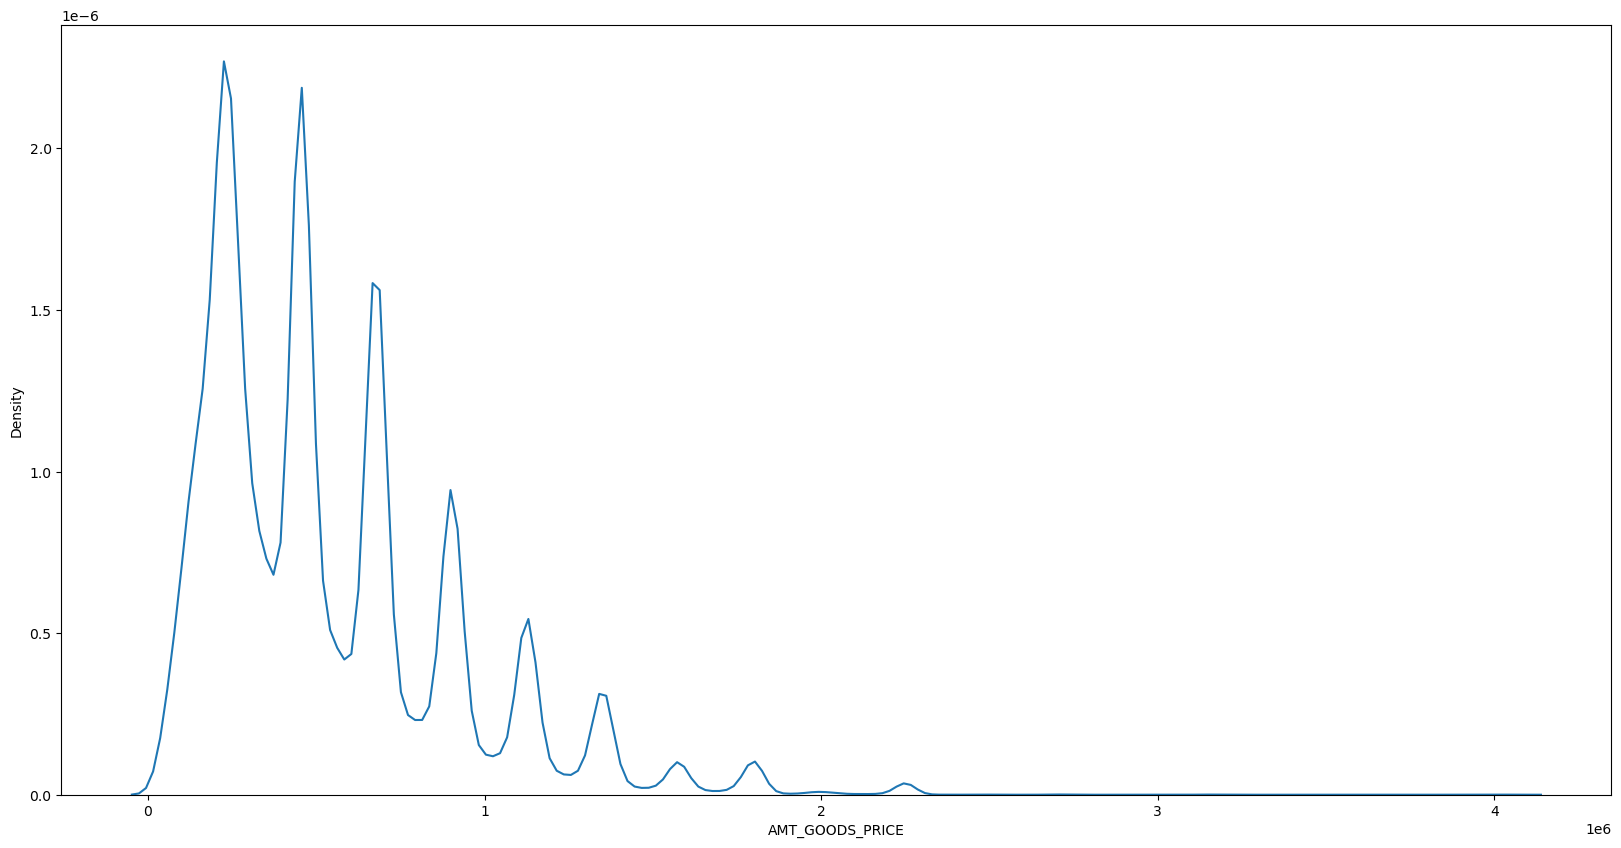

In [46]:
plt.figure(figsize = (20,10))
sns.kdeplot(data = data, x = 'AMT_GOODS_PRICE')
plt.show()

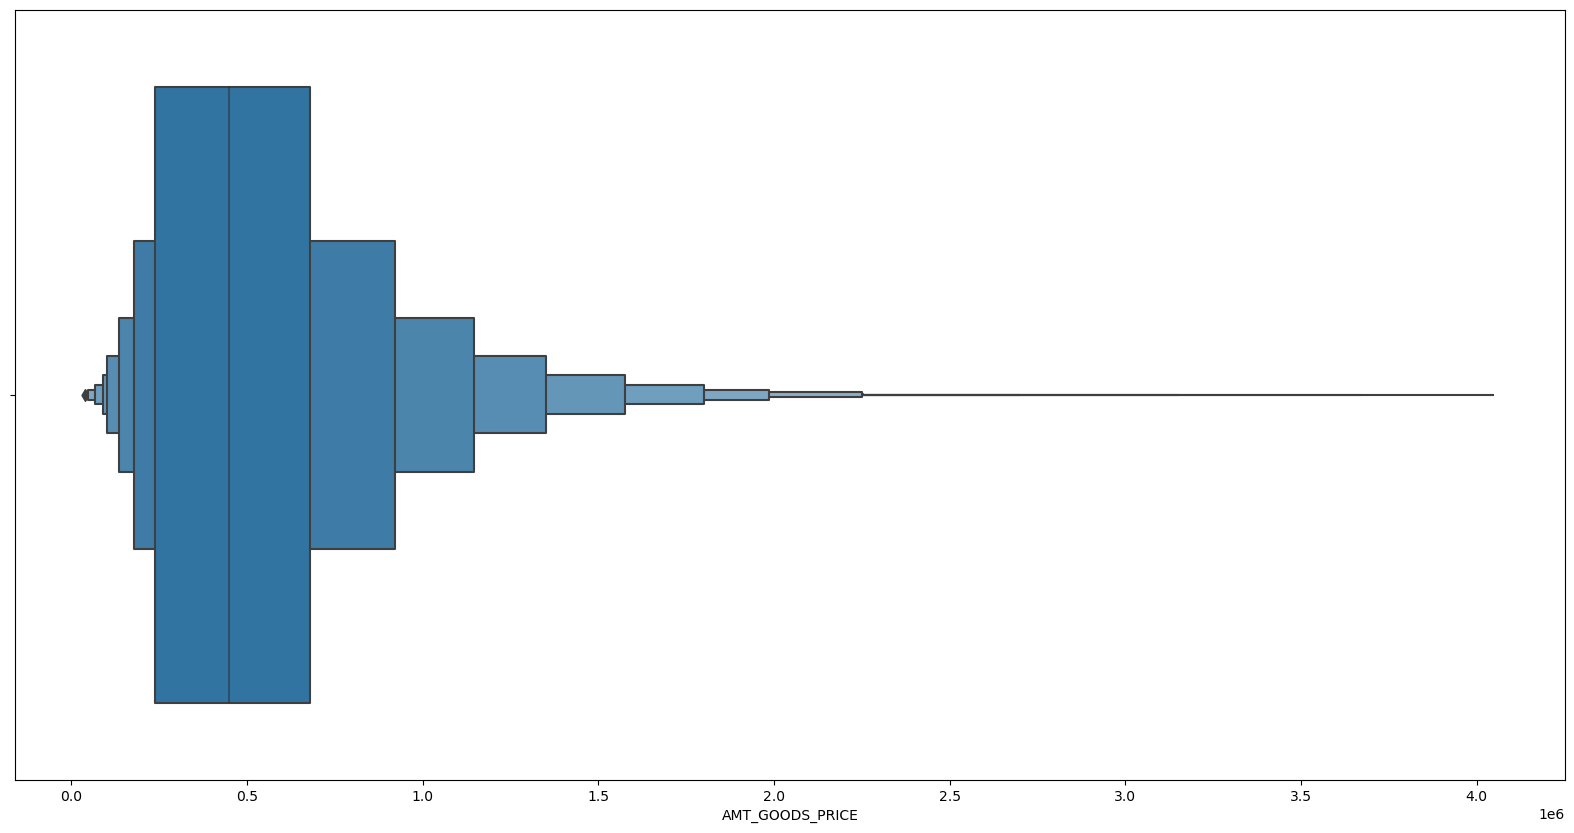

In [47]:
plt.figure(figsize = (20,10))
sns.boxenplot(data = data, x = 'AMT_GOODS_PRICE')
plt.show()

In [48]:
#AMT_GOODS_PRICE
data['AMT_GOODS_PRICE'].quantile([0.1,0.25,0.5,0.75,0.9])

0.10     180000.0
0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

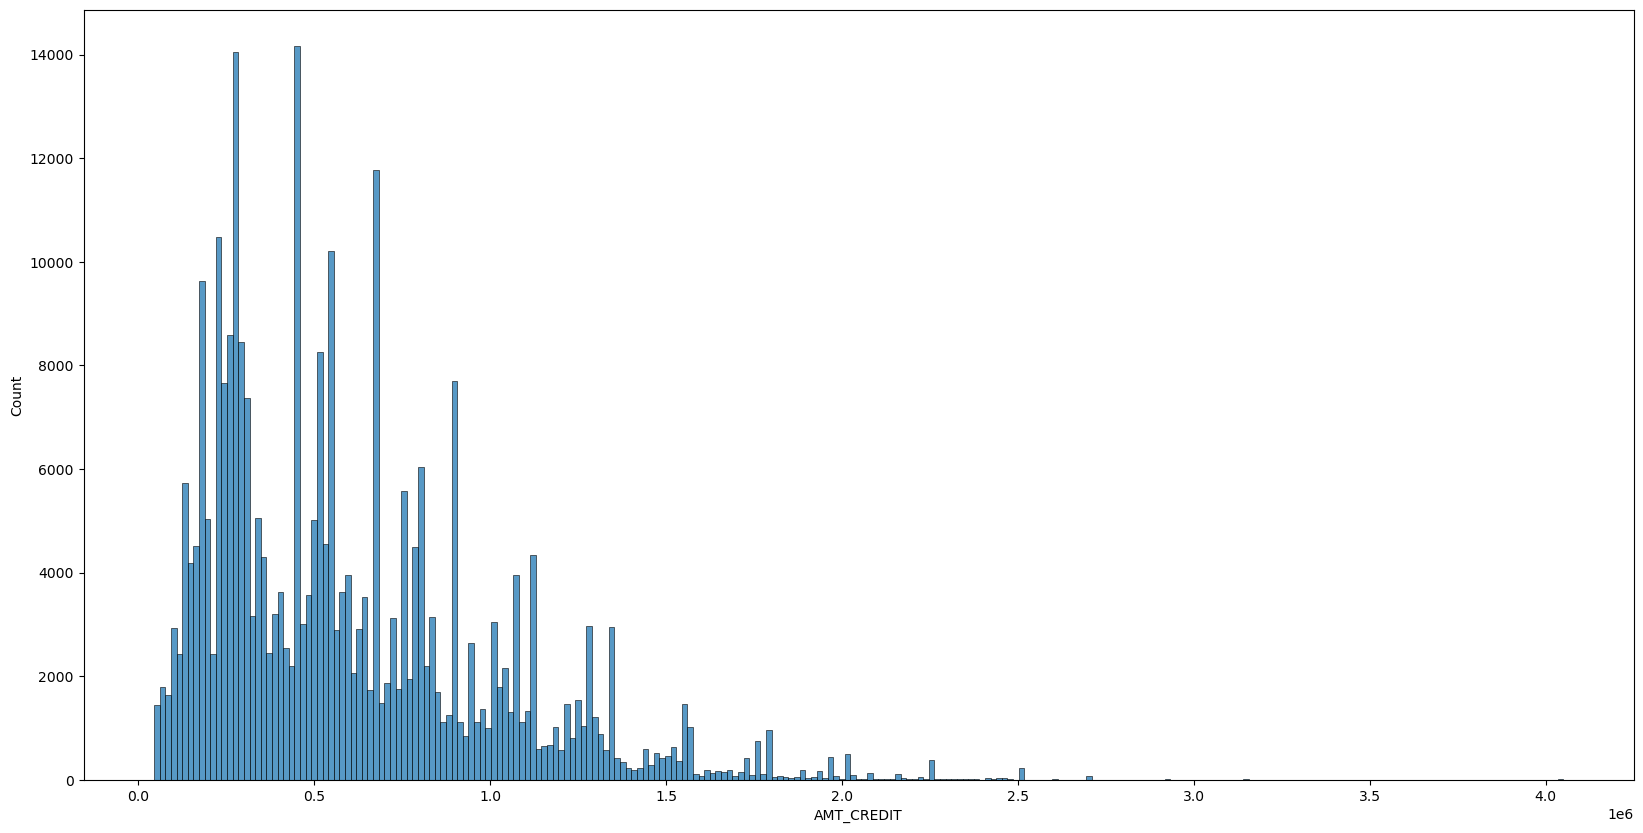

In [49]:
plt.figure(figsize = (20,10))
sns.histplot(data.AMT_CREDIT)

In [50]:
data.AMT_CREDIT.describe().loc[['min','max']]

min      45000.0
max    4050000.0
Name: AMT_CREDIT, dtype: float64

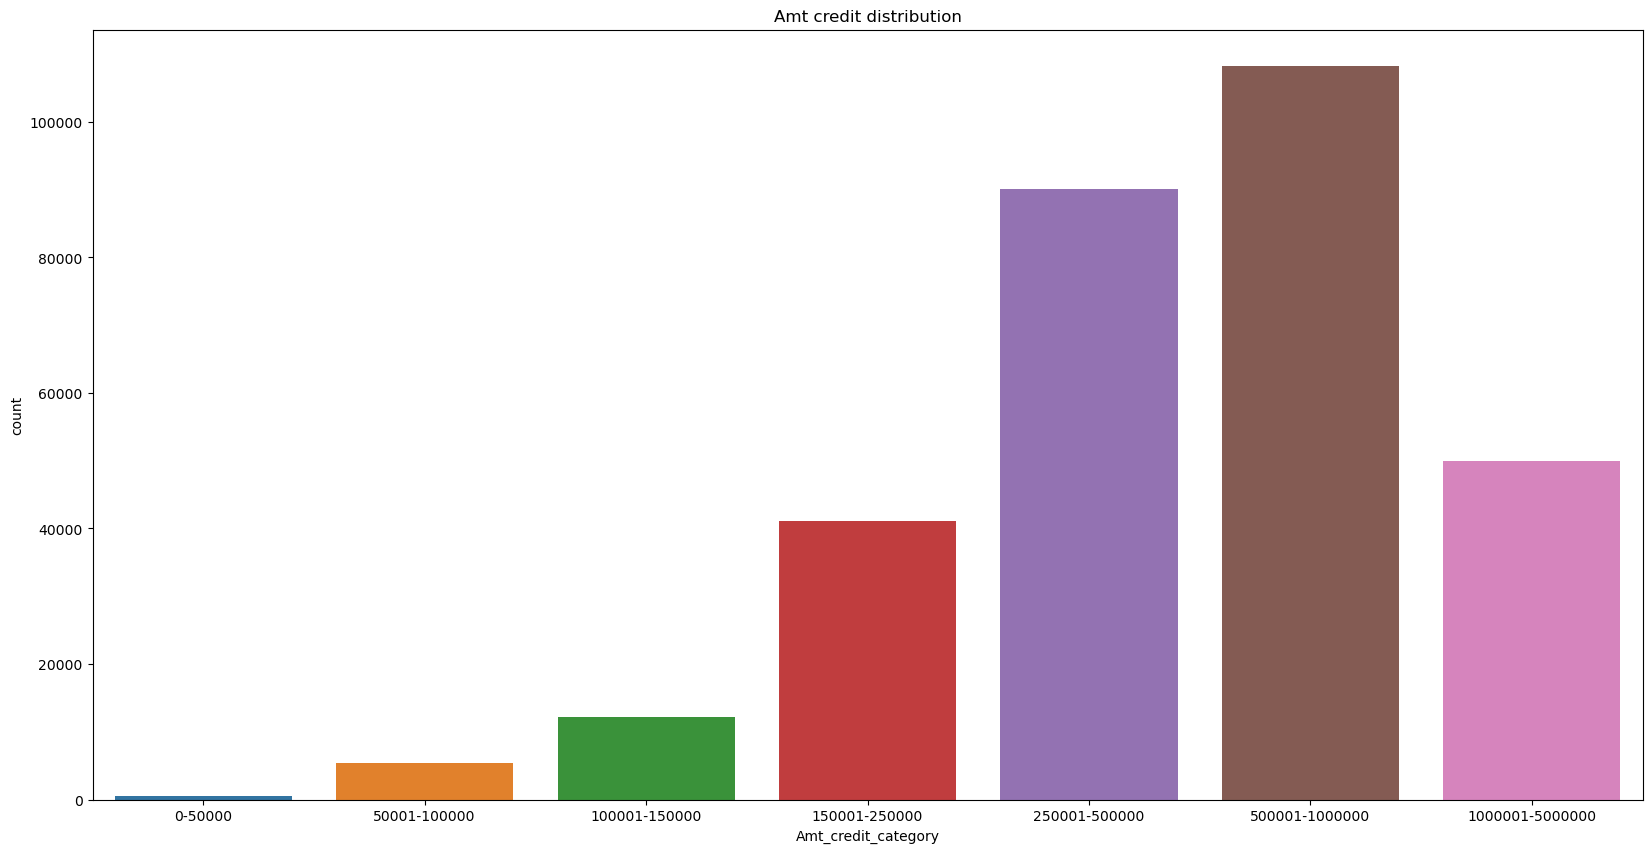

In [51]:
labels = ['0-50000', '50001-100000', '100001-150000', '150001-250000', '250001-500000', '500001-1000000', '1000001-5000000']
data['Amt_credit_category'] = pd.cut(data['AMT_CREDIT'], bins=[0, 50000, 100000, 150000, 250000, 500000, 1000000, 5000000], labels=labels)

plt.figure(figsize=(20, 10))
sns.countplot(x=data['Amt_credit_category'])
plt.title('Amt credit distribution')
plt.show()


In [52]:
data.AMT_GOODS_PRICE.describe().loc[['min','max']]

min      40500.0
max    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

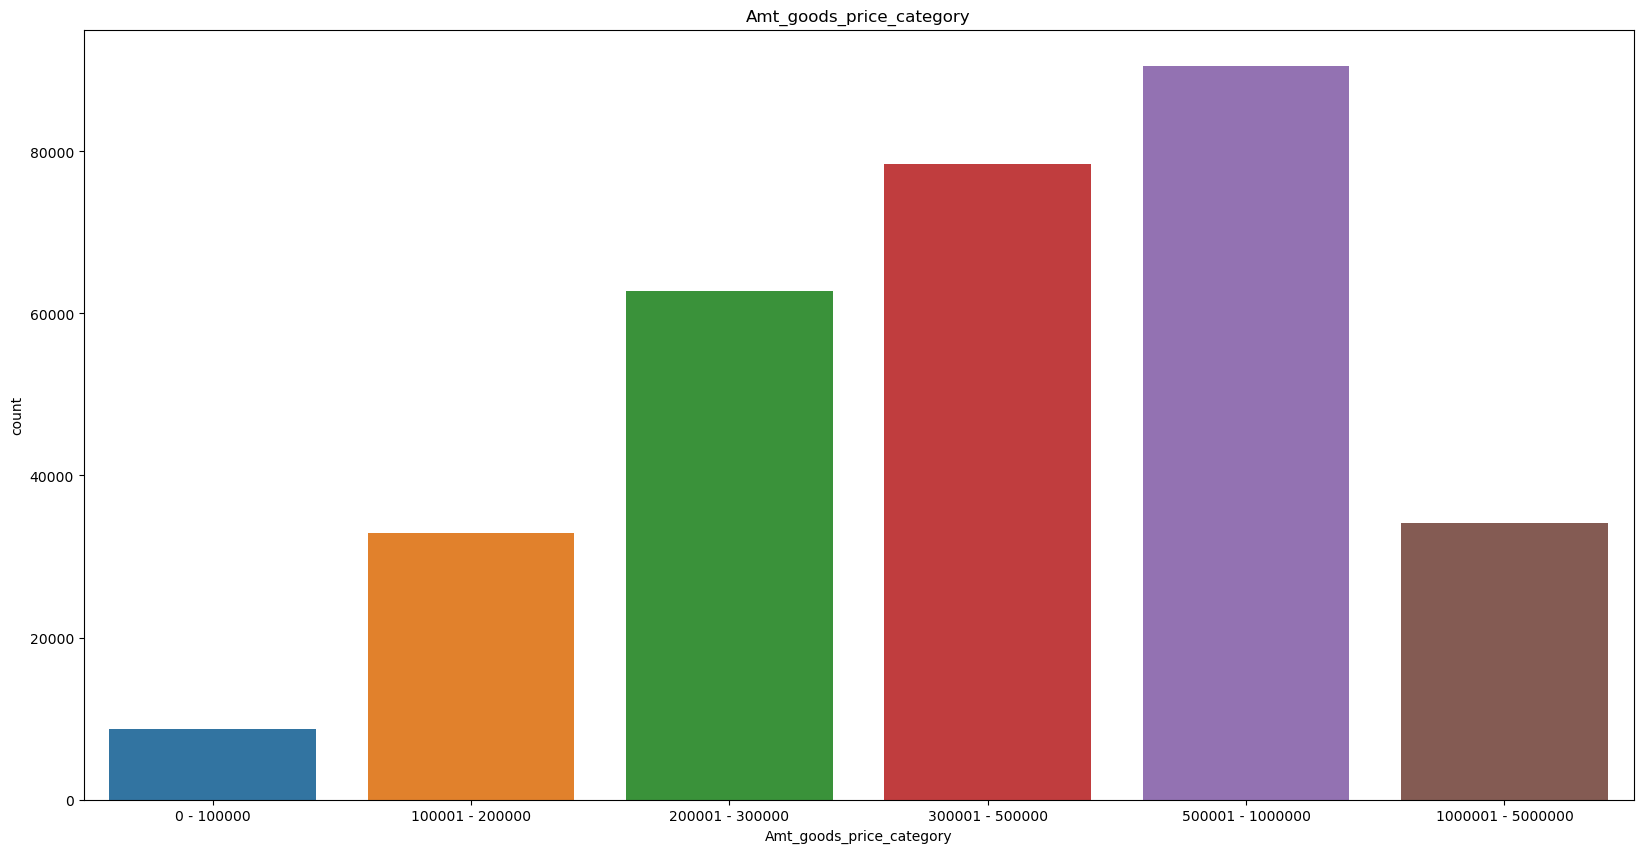

In [53]:
# AMT_GOODS_PRICE
labels= ['0 - 100000','100001 - 200000','200001 - 300000','300001 - 500000','500001 - 1000000','1000001 - 5000000']
data['Amt_goods_price_category'] = pd.cut(data['AMT_GOODS_PRICE'], bins=[0,100000,200000,300000,500000,1000000,5000000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_goods_price_category'])
plt.title('Amt_goods_price_category')
plt.show()

In [54]:
data.AMT_ANNUITY.describe().loc[['min','max']]

min      1615.5
max    258025.5
Name: AMT_ANNUITY, dtype: float64

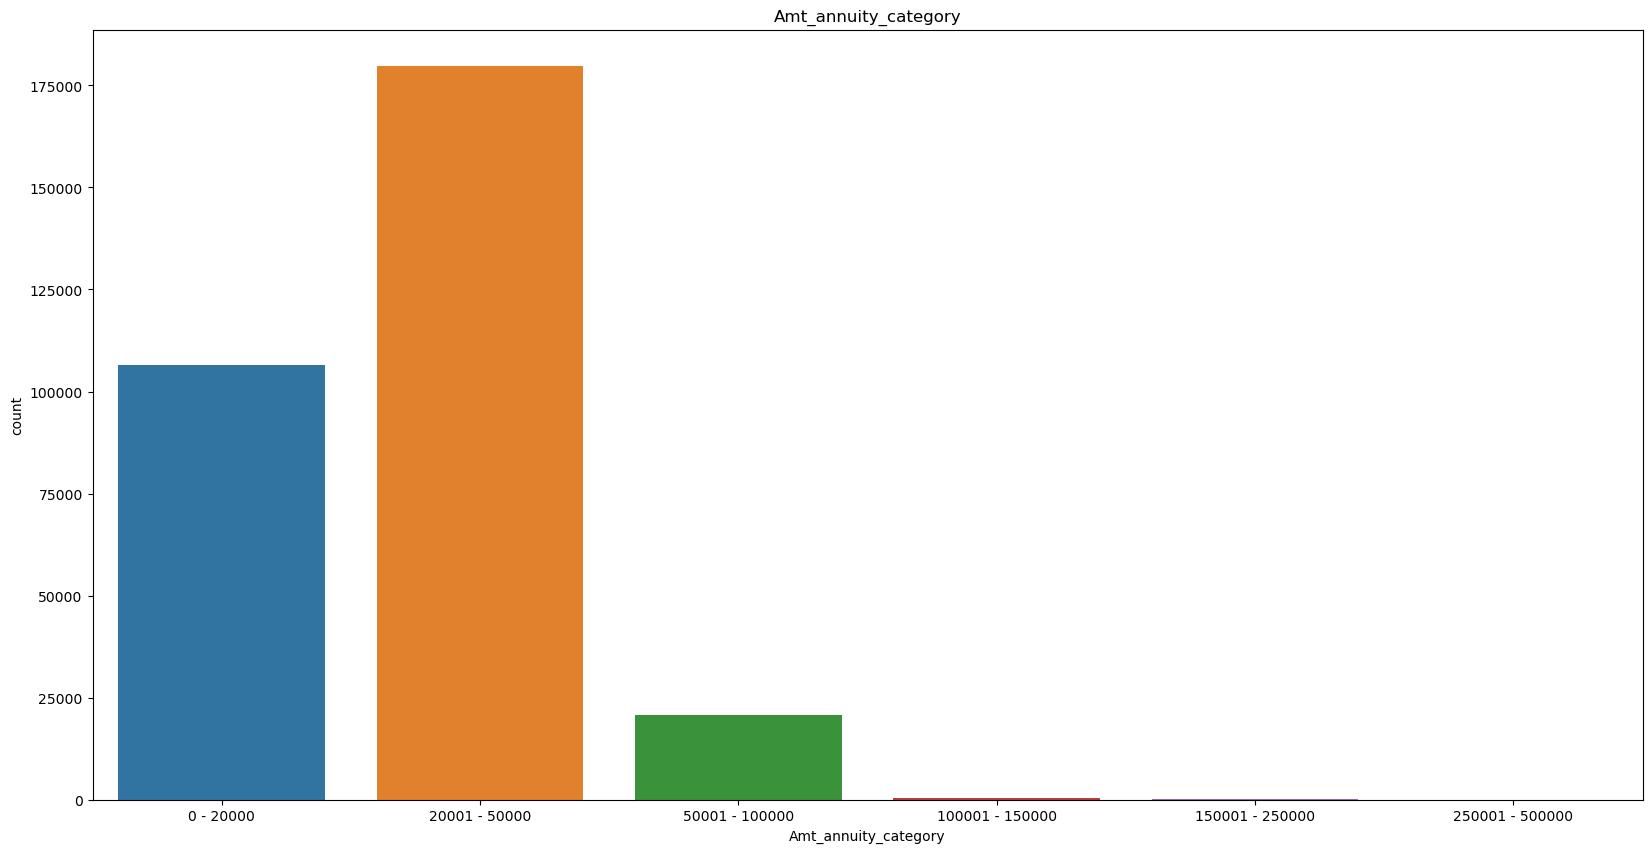

In [55]:
# AMT_ANNUITY
labels= ['0 - 20000','20001 - 50000','50001 - 100000','100001 - 150000','150001 - 250000','250001 - 500000']
data['Amt_annuity_category'] = pd.cut(data['AMT_ANNUITY'], bins=[0,20000,50000,100000,150000,250000,300000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_annuity_category'])
plt.title('Amt_annuity_category')
plt.show()

In [56]:
data.AMT_INCOME_TOTAL.describe().loc[['min','max']]

min        25650.0
max    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

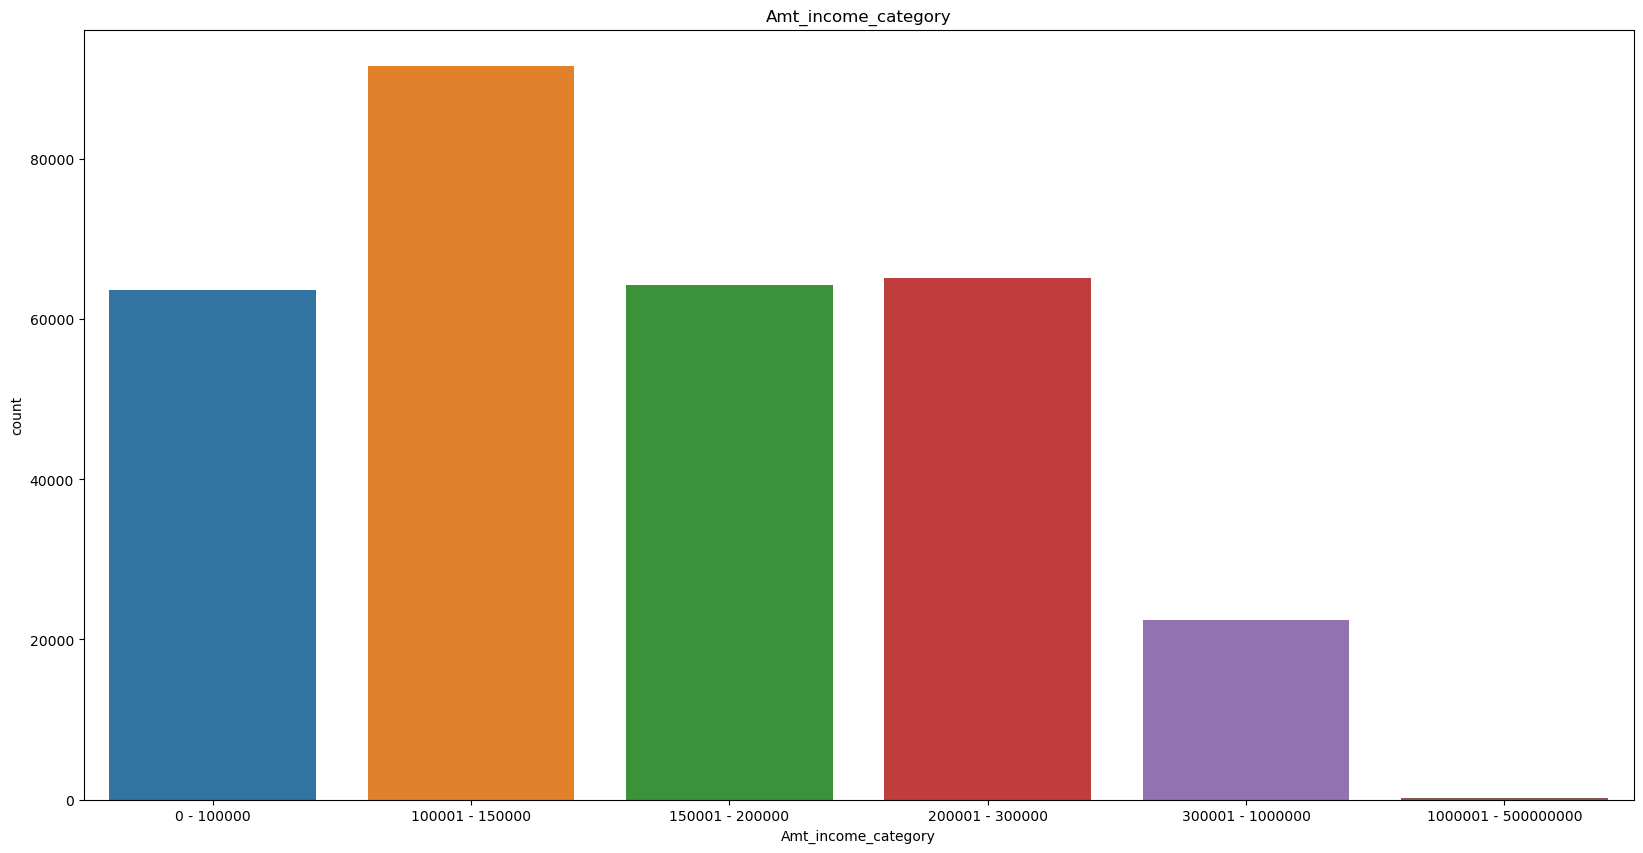

In [57]:
# AMT_INCOME_TOTAL
labels= ['0 - 100000','100001 - 150000','150001 - 200000','200001 - 300000','300001 - 1000000','1000001 - 500000000']
data['Amt_income_category'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=[0,100000,150000,200000,300000,1000000,500000000], labels=labels)

plt.figure(figsize=(20,10))
sns.countplot(x=data['Amt_income_category'])
plt.title('Amt_income_category')
plt.show()


#### CATEGORICAL VARIABLES DATA VISUALIZATION

In [58]:
# NAME_CONTRACT_TYPE
data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278231
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

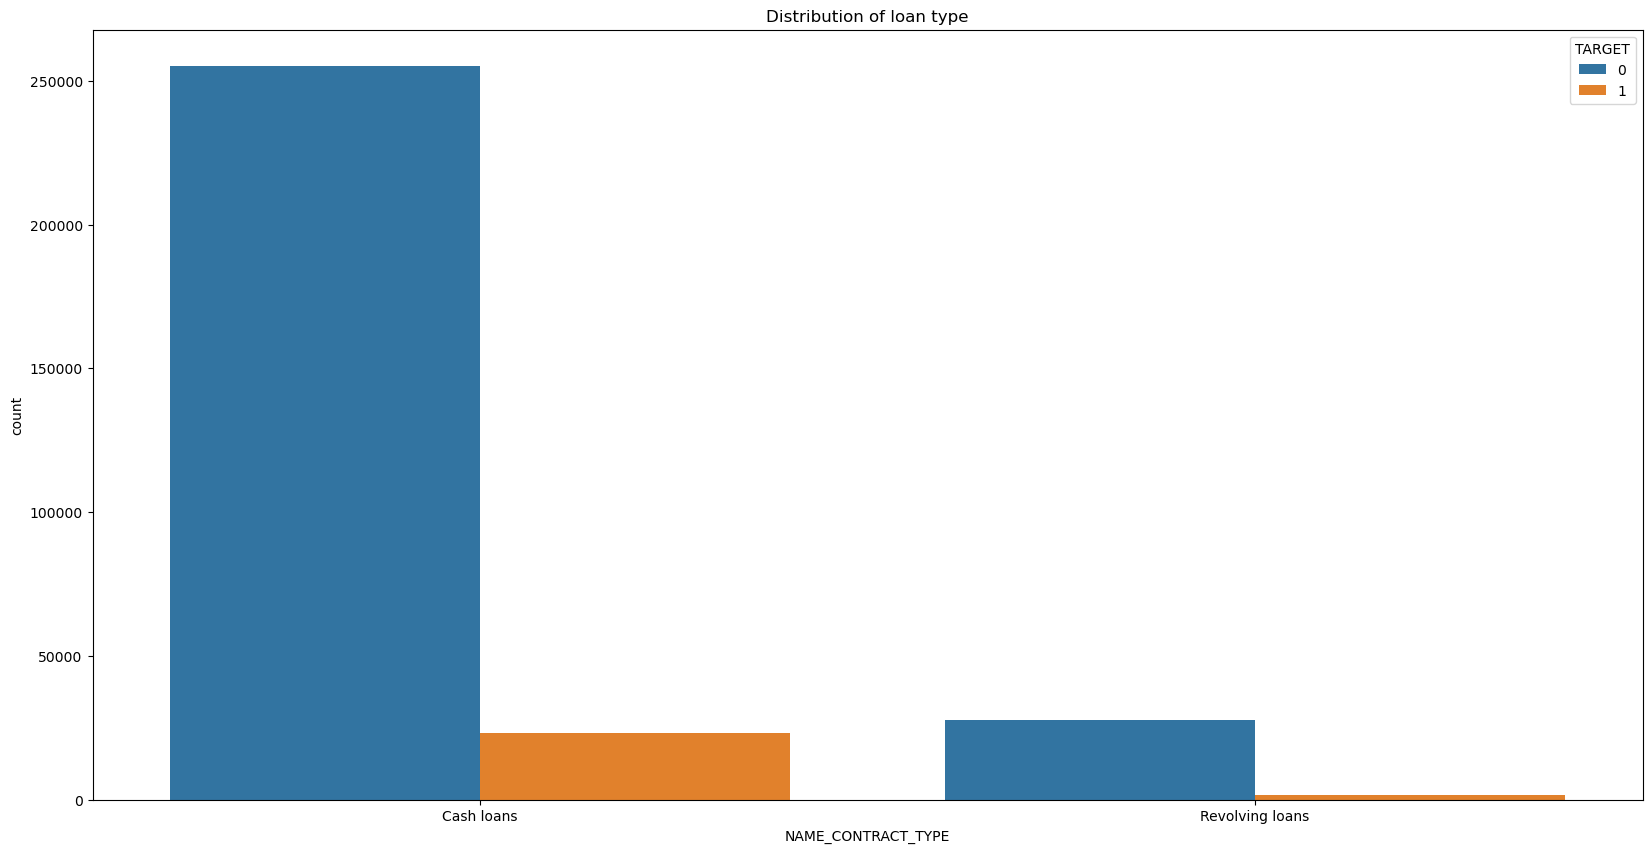

In [59]:
#countplot
plt.figure(figsize = (20,10))
sns.countplot(x='NAME_CONTRACT_TYPE', data=data, hue = "TARGET")
plt.title('Distribution of loan type')
plt.show()

Based on the observations, there is a strong indication or pattern that individuals who have taken a cash loan (presumably a type of loan where the borrower receives cash directly) are more likely to default on their loans compared to individuals who have not taken a cash loan.

In [60]:
# Dataframe for loan type with target
loan_with_target = data.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().reset_index(name='count')

loan_with_target['percentage'] = round((loan_with_target['count']/len(data['NAME_CONTRACT_TYPE']))*100,2)
loan_with_target

,NAME_CONTRACT_TYPE,TARGET,count,percentage
0,Cash loans,0,255010,82.93
1,Cash loans,1,23221,7.55
2,Revolving loans,0,27675,9.00
3,Revolving loans,1,1604,0.52


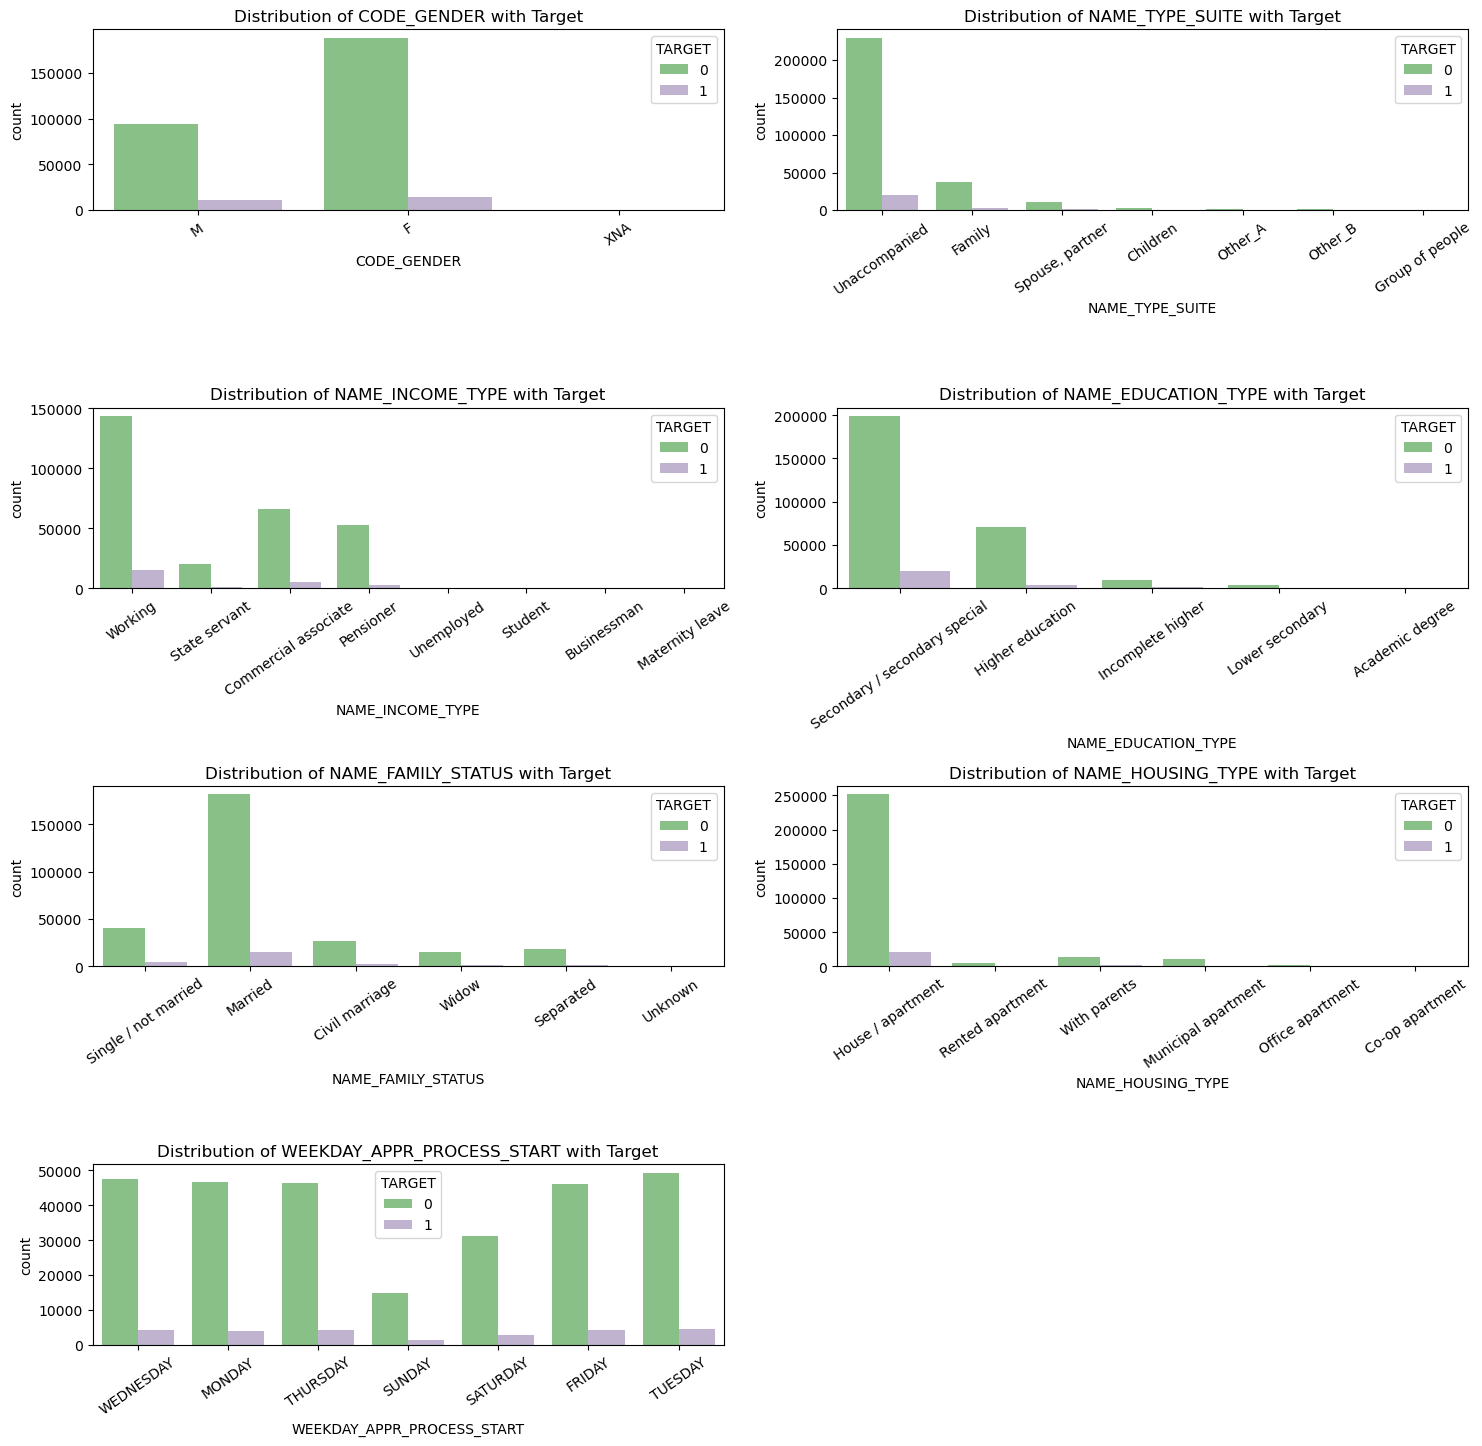

In [61]:
cols = ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']

# Countplot
plt.figure(figsize=(15, 25))
index = 0  # Initialize an index variable
for c in cols:
    plt.subplot(len(cols), 2, index + 1)
    sns.countplot(x=c, data=data, hue='TARGET', palette='Accent')
    plt.title(f"Distribution of {c} with Target")
    plt.xticks(rotation=35)
    index += 1  # Increment the index

plt.tight_layout()

**By Close observation of each bar chart, we can come to following conclusions:**
1. Females are less likely to default the loan than male.
2. Working client, Commercial associate and Pensioner have taken more loans.
3. Unaccompanied has taken most number of loans.
4. Married client has received more number of credits.
5. Most of the clients have their house apartment.
6. All days have equal number of application received, except sunday.

In [62]:
#organization type
data['ORGANIZATION_TYPE'].value_counts().sort_values(ascending = False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

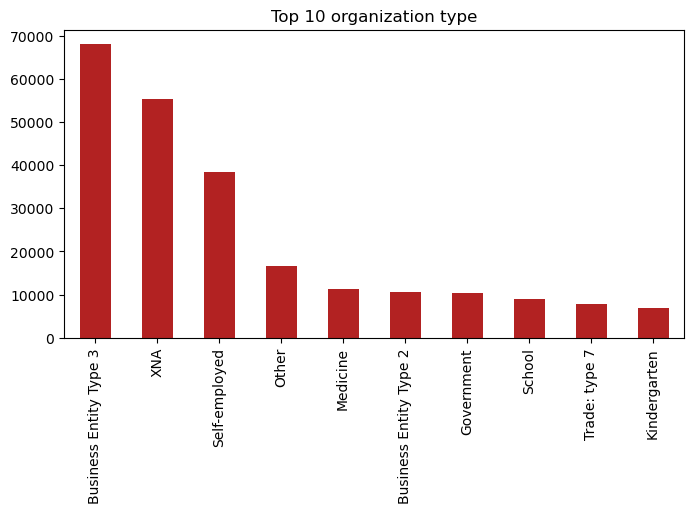

In [63]:
# Organization type
plt.figure(figsize = (8,4))
data['ORGANIZATION_TYPE'].value_counts().sort_values(ascending = False)[:10].plot(kind ='bar', color = 'firebrick')
plt.title('Top 10 organization type')
plt.show()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307510 non-null  int64   
 1   TARGET                       307510 non-null  int64   
 2   NAME_CONTRACT_TYPE           307510 non-null  object  
 3   CODE_GENDER                  307510 non-null  object  
 4   CNT_CHILDREN                 307510 non-null  int64   
 5   AMT_INCOME_TOTAL             307510 non-null  float64 
 6   AMT_CREDIT                   307510 non-null  float64 
 7   AMT_ANNUITY                  307510 non-null  float64 
 8   AMT_GOODS_PRICE              307510 non-null  float64 
 9   NAME_TYPE_SUITE              307510 non-null  object  
 10  NAME_INCOME_TYPE             307510 non-null  object  
 11  NAME_EDUCATION_TYPE          307510 non-null  object  
 12  NAME_FAMILY_STATUS           307510 non-null

In [65]:
# numeric features and categorical features
num_features = data.select_dtypes(include = ['int','float']).columns
num_cat_features = data.select_dtypes(include = ['int','float','category']).columns

In [66]:
num_features

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [67]:
# Create the num_data DataFrame
num_data = data[num_features]

# Print the head of the num_data DataFrame
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data['TARGET'].unique()

array([1, 0], dtype=int64)

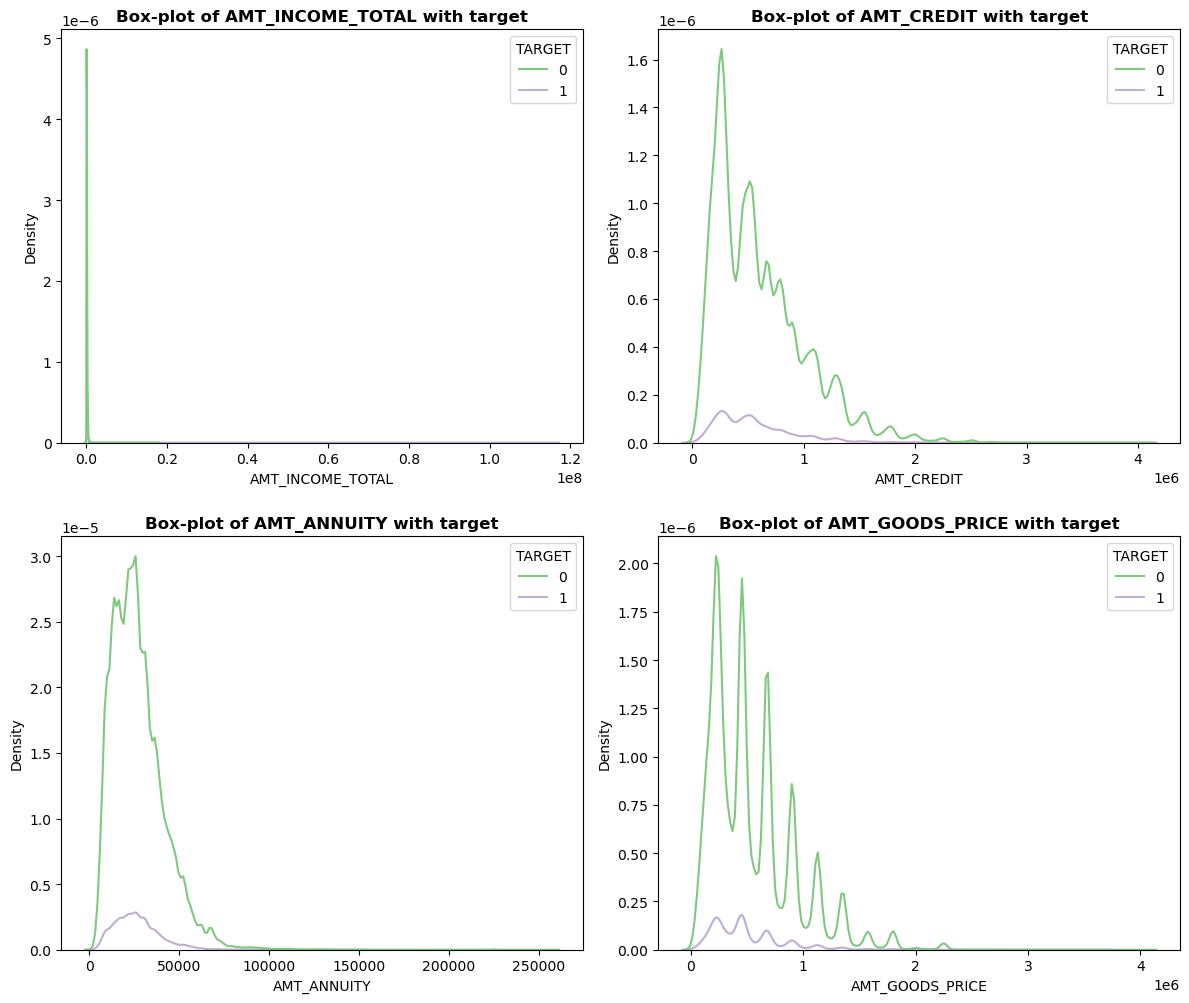

In [69]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

plt.figure(figsize=(12,20))
for index, k in enumerate(amt_var):
 plt.subplot(len(amt_var),2, index+1)
 sns.kdeplot(x=k, data=num_data, hue='TARGET', palette='Accent')
 plt.title(f"Box-plot of {k} with target", fontweight='bold')

plt.tight_layout()

**Observations:**

1. Most of the defaulters are from high-income groups.
2. Most defaulters fall under the category of amt_credit between 0 to 1 million.
3. Annuity payment of 0 to 50000 have more number of defaults.
4. Amount goods price between o to 1 million have more number of defaults.


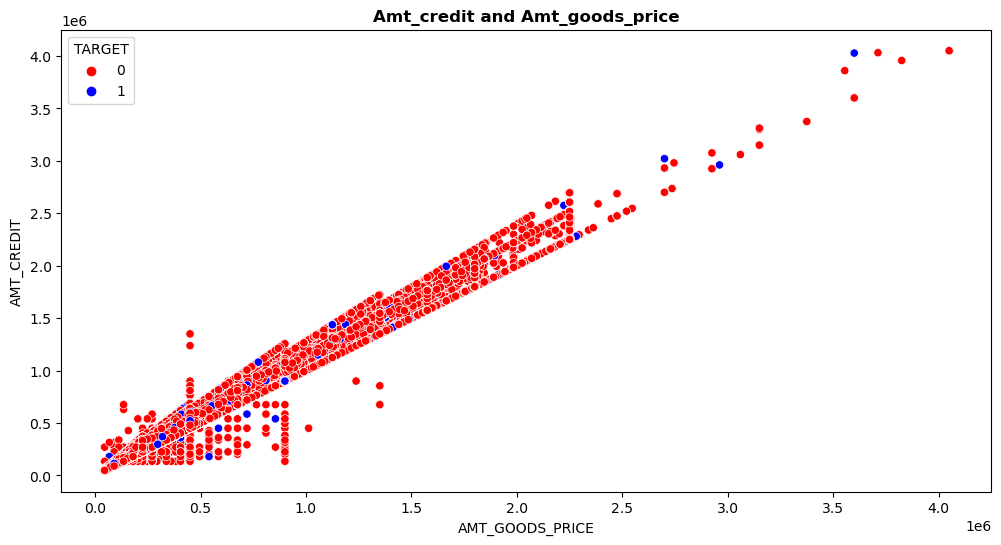

In [70]:
# Scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=num_data, x='AMT_GOODS_PRICE', y='AMT_CREDIT', palette=['red', 'blue'], hue='TARGET')
plt.title("Amt_credit and Amt_goods_price", fontweight='bold')
plt.show()


Here we can observe that **Amt_goods_price and Amt_credit have linear relation.** And, most of the defaulters are under 1
million level.

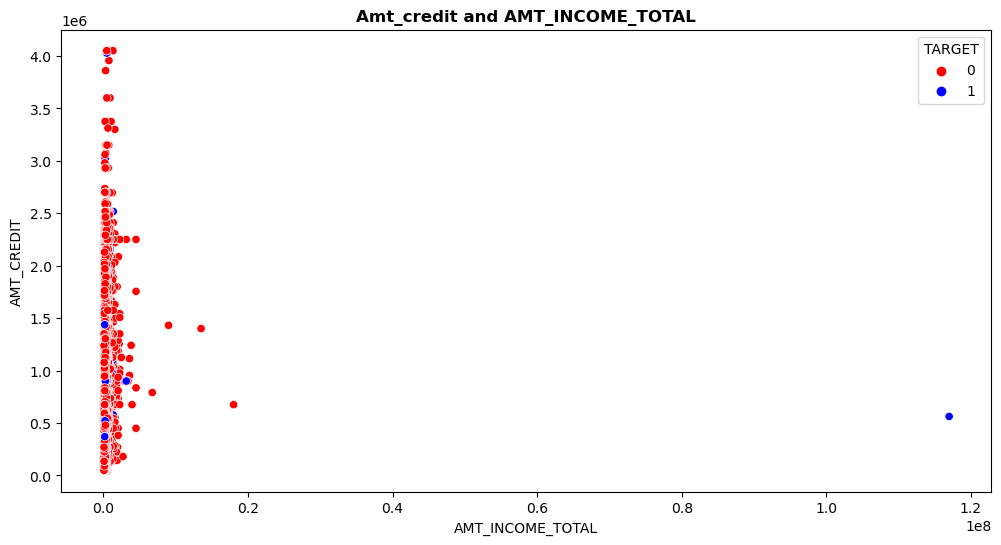

In [71]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=num_data, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', palette=['red', 'blue'], hue='TARGET')
plt.title("Amt_credit and AMT_INCOME_TOTAL", fontweight='bold')
plt.show()

People with income less than 1 million is taking more number of loans. And, people who got credit/loans less than 150,000
are more likely to default.

**Final Observations:**
1. Female loan has less default rate. So, the bank should give a little bit priority to females.
2. Those clients who do not have any accompany should be focused.
3. Safest segementation of employment are workers, commercial associates and pensioners.
4. Client who have the higher education should be given more loans.
5. Married clients are safer than unmarried.
6. People having house/apartment are safer to provide loans.
7. Low-skill laborers and drivers should be given less priority as they have high probability of making defaults.
8. People having income less than 1 million and taking loans near to 1 million have higher chance of defaults. So, should
not be given focus.
9. Married couples having children less than five are safe for providng loans.
10. Client having annuity less than 100K are safer side for the bank.
